# AUTOMATED STOCK OPEN PRICE PREDICTION
### AUTHOR : Aravind Ravikumar
### DATE WRITTEN: 7-June-2020
### Goal: To predict Open price of HCL Tech 

In [25]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
train = pd.read_csv('../Data/STOCKS.CSV')
dfg = pd.read_csv('../Data/HangSeng.CSV')
dfy = pd.read_csv('../Data/NYSE.CSV')
dfz = pd.read_csv('../Data/Shenzhen.CSV')
dfk = pd.read_csv('../Data/KOSPI.CSV')
dfe = pd.read_csv('../Data/Euronext100.CSV')
dfx = pd.read_csv('../Data/SGXNifty.CSV')
dfn = pd.read_csv('../Data/NASDAQ.CSV')
dfi = pd.read_csv('../Data/Nikkei.CSV')

In [27]:
dfi.head()

,Date,Nikkei Open
0,07-01-2015,16808.25977
1,08-01-2015,17067.40039
2,09-01-2015,17318.74023
3,13-01-2015,16970.88086
4,14-01-2015,16961.82031


In [28]:
dfx.head()

,Date,SGXNifty Open
0,"Jan 07, 2015","8,149.50"
1,"Jan 08, 2015","8,151.50"
2,"Jan 09, 2015","8,256.50"
3,"Jan 12, 2015","8,314.50"
4,"Jan 13, 2015","8,357.50"


## Converting to common date format

In [29]:
train['Date'] =  pd.to_datetime(train['Date'], format='%d-%m-%Y')
dfg['Date'] =  pd.to_datetime(dfg['Date'], format='%d-%m-%Y')
dfy['Date'] =  pd.to_datetime(dfy['Date'], format='%d-%m-%Y')
dfz['Date'] =  pd.to_datetime(dfz['Date'], format='%d-%m-%Y')
dfk['Date'] =  pd.to_datetime(dfk['Date'], format='%d-%m-%Y')
dfe['Date'] =  pd.to_datetime(dfe['Date'], format='%d-%m-%Y')
dfx['Date'] =  pd.to_datetime(dfx['Date'], format='%b %d, %Y')
dfn['Date'] =  pd.to_datetime(dfn['Date'], format='%d-%m-%Y')
dfi['Date'] =  pd.to_datetime(dfi['Date'], format='%d-%m-%Y')

## Merging Dataframes on the basis of date

In [30]:
train = pd.merge(train,dfg,how='inner',on='Date')
train = pd.merge(train,dfz,how='inner',on='Date')
train = pd.merge(train,dfy,how='inner',on='Date')
train = pd.merge(train,dfk,how='inner',on='Date')
train = pd.merge(train,dfe,how='inner',on='Date')
train = pd.merge(train,dfx,how='inner',on='Date')
train = pd.merge(train,dfn,how='inner',on='Date')
train = pd.merge(train,dfi,how='inner',on='Date')

In [31]:
train['SGXNifty Open'] = train['SGXNifty Open'].str.replace(",","").astype(float) # string to float conversion

In [32]:
train.head()

,Date,NIFTY_India Adj Close,Escorts Adj Close,Muthoot Adj Close,SBI Adj Close,HCL Adj Close,ICICI Adj Close,Escorts Open,Muthoot Open,SBI Open,HCL Open,ICICI Open,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open
0,2015-01-07,8127.350098,119.312721,172.062637,289.701782,322.932098,292.334198,120.250000,195.899994,300.000000,384.875000,314.182007,23396.69922,11612.73047,10514.87012,1878.900024,805.469971,8149.5,4592.740234,16808.25977
1,2015-01-08,8102.100098,118.381363,171.755310,289.943268,315.258636,284.430267,122.099998,197.000000,305.000000,379.250000,313.635986,23920.34961,11624.58984,10627.12988,1895.849976,810.940002,8151.5,4650.470215,17067.40039
2,2015-01-09,8234.599609,123.626411,172.589493,294.483459,322.553589,292.166840,127.400002,201.050003,306.700012,384.162994,318.135986,24049.69922,11424.53027,10800.54004,1919.800049,837.729980,8256.5,4736.189941,17318.74023
3,2015-01-13,8323.000000,122.891121,172.238251,296.656952,331.226013,291.409241,125.250000,195.350006,308.149994,393.888000,317.273010,23908.23047,11250.87988,10640.74023,1915.030029,832.760010,8357.5,4664.709961,16970.88086
4,2015-01-14,8299.400391,124.067589,172.150452,294.724976,332.917969,286.658508,126.099998,196.199997,304.000000,398.975006,308.408997,24276.33008,11366.95020,10622.95996,1919.310059,845.299988,8343.5,4661.500000,16961.82031


In [33]:
train.shape

(1081, 20)

In [34]:
train.columns

Index(['Date', 'NIFTY_India Adj Close', 'Escorts Adj Close',
       'Muthoot Adj Close', 'SBI Adj Close', 'HCL Adj Close',
       'ICICI Adj Close', 'Escorts Open', 'Muthoot Open', 'SBI Open',
       'HCL Open', 'ICICI Open', 'HangSeng Open', 'Shenzhen Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close', 'SGXNifty Open',
       'NASDAQ Adj Close', 'Nikkei Open'],
      dtype='object')

In [35]:
# Rearrange columns

train = train[['Date', 'NIFTY_India Adj Close', 'HCL Adj Close',
       'HangSeng Open', 'Shenzhen Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close', 'SGXNifty Open',
       'NASDAQ Adj Close', 'Nikkei Open', 'HCL Open']]

In [36]:
train.head(2)

,Date,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,HCL Open
0,2015-01-07,8127.350098,322.932098,23396.69922,11612.73047,10514.87012,1878.900024,805.469971,8149.5,4592.740234,16808.25977,384.875
1,2015-01-08,8102.100098,315.258636,23920.34961,11624.58984,10627.12988,1895.849976,810.940002,8151.5,4650.470215,17067.40039,379.250


In [37]:
train.isnull().sum()

Date                      0
NIFTY_India Adj Close     6
HCL Adj Close             2
HangSeng Open             3
Shenzhen Open             1
NYSE Adj Close            0
KOSPI Open                5
Euronext Adj Close        1
SGXNifty Open             0
NASDAQ Adj Close          0
Nikkei Open              13
HCL Open                  0
dtype: int64

In [38]:
#Displaying rows having Null values

train[train['HCL Adj Close'].isnull()]

,Date,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,HCL Open
27,2015-03-02,NaN,NaN,24996.75977,11869.959960,11062.79004,1996.719971,973.010010,8895.5,4963.529785,18869.40039,510.225006
990,2019-10-29,NaN,NaN,27027.56055,9812.480469,13186.42969,2103.919922,1099.329956,11668.0,8325.990234,22950.78906,565.450012


In [39]:
# strategies to fill null values
#train['Escorts Open'][train['Date'] == '10/25/2019'] = train['Escorts Open'][train['Date'] == '10/27/2019']
train['NIFTY_India Adj Close'].fillna(train['NIFTY_India Adj Close'].mean(),inplace=True)
train['Nikkei Open'].fillna(train['Nikkei Open'].mean(),inplace=True)
train.dropna(axis=0,inplace=True)

In [40]:
train.shape

(1069, 12)

In [41]:
train.isnull().sum()

Date                     0
NIFTY_India Adj Close    0
HCL Adj Close            0
HangSeng Open            0
Shenzhen Open            0
NYSE Adj Close           0
KOSPI Open               0
Euronext Adj Close       0
SGXNifty Open            0
NASDAQ Adj Close         0
Nikkei Open              0
HCL Open                 0
dtype: int64

# Feature Selection Methods 
## Filter Method: Correlation Coefficient

In [42]:
train.head()

,Date,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,HCL Open
0,2015-01-07,8127.350098,322.932098,23396.69922,11612.73047,10514.87012,1878.900024,805.469971,8149.5,4592.740234,16808.25977,384.875000
1,2015-01-08,8102.100098,315.258636,23920.34961,11624.58984,10627.12988,1895.849976,810.940002,8151.5,4650.470215,17067.40039,379.250000
2,2015-01-09,8234.599609,322.553589,24049.69922,11424.53027,10800.54004,1919.800049,837.729980,8256.5,4736.189941,17318.74023,384.162994
3,2015-01-13,8323.000000,331.226013,23908.23047,11250.87988,10640.74023,1915.030029,832.760010,8357.5,4664.709961,16970.88086,393.888000
4,2015-01-14,8299.400391,332.917969,24276.33008,11366.95020,10622.95996,1919.310059,845.299988,8343.5,4661.500000,16961.82031,398.975006


In [43]:
cor = train.corr()
cor

,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,HCL Open
NIFTY_India Adj Close,1.000000,0.896625,0.766893,-0.450094,0.945338,0.495026,0.842400,0.998477,0.947671,0.824164,0.777039
HCL Adj Close,0.896625,1.000000,0.630363,-0.374884,0.844548,0.264869,0.790730,0.896821,0.916721,0.793313,0.949463
HangSeng Open,0.766893,0.630363,1.000000,-0.005471,0.833537,0.777748,0.806060,0.767356,0.703703,0.832053,0.564377
Shenzhen Open,-0.450094,-0.374884,-0.005471,1.000000,-0.303254,-0.018939,-0.083794,-0.452783,-0.446607,-0.141168,-0.197152
NYSE Adj Close,0.945338,0.844548,0.833537,-0.303254,1.000000,0.624710,0.919124,0.947106,0.920579,0.889342,0.734936
KOSPI Open,0.495026,0.264869,0.777748,-0.018939,0.624710,1.000000,0.624734,0.497214,0.417057,0.618370,0.144969
Euronext Adj Close,0.842400,0.790730,0.806060,-0.083794,0.919124,0.624734,1.000000,0.843630,0.810895,0.904074,0.750047
SGXNifty Open,0.998477,0.896821,0.767356,-0.452783,0.947106,0.497214,0.843630,1.000000,0.947391,0.825160,0.777934
NASDAQ Adj Close,0.947671,0.916721,0.703703,-0.446607,0.920579,0.417057,0.810895,0.947391,1.000000,0.821314,0.777459
Nikkei Open,0.824164,0.793313,0.832053,-0.141168,0.889342,0.618370,0.904074,0.825160,0.821314,1.000000,0.742499


In [44]:
cor.index[abs(cor['HCL Open']) > .65]

Index(['NIFTY_India Adj Close', 'HCL Adj Close', 'NYSE Adj Close',
       'Euronext Adj Close', 'SGXNifty Open', 'NASDAQ Adj Close',
       'Nikkei Open', 'HCL Open'],
      dtype='object')

## Wrapper Method: Step forward feature selection

In [41]:
X = train[train.columns[1:-1]]
Y = train[train.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(LinearRegression(), 
           k_features=5, 
           forward=True, 
           floating=False,
           scoring='neg_mean_squared_error',
           cv=5)

# fit the object to the training data.
sfs = sfs.fit(X_train, y_train)

# print the selected features.
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

Index(['HCL Adj Close', 'Shenzhen Open', 'KOSPI Open', 'NASDAQ Adj Close',
       'Nikkei Open'],
      dtype='object')


## Finding Independent Features

In [45]:
train2 = train[['NIFTY_India Adj Close', 'HCL Adj Close', 'NYSE Adj Close',
       'Euronext Adj Close', 'SGXNifty Open', 'NASDAQ Adj Close',
       'Nikkei Open']]

In [46]:
train2.head(2)

,NIFTY_India Adj Close,HCL Adj Close,NYSE Adj Close,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open
0,8127.350098,322.932098,10514.87012,805.469971,8149.5,4592.740234,16808.25977
1,8102.100098,315.258636,10627.12988,810.940002,8151.5,4650.470215,17067.40039


In [24]:
cor2 = train2.corr()
cor2

,NIFTY_India Adj Close,HCL Adj Close,NYSE Adj Close,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open
NIFTY_India Adj Close,1.000000,0.896625,0.945338,0.842400,0.998477,0.947671,0.824164
HCL Adj Close,0.896625,1.000000,0.844548,0.790730,0.896821,0.916721,0.793313
NYSE Adj Close,0.945338,0.844548,1.000000,0.919124,0.947106,0.920579,0.889342
Euronext Adj Close,0.842400,0.790730,0.919124,1.000000,0.843630,0.810895,0.904074
SGXNifty Open,0.998477,0.896821,0.947106,0.843630,1.000000,0.947391,0.825160
NASDAQ Adj Close,0.947671,0.916721,0.920579,0.810895,0.947391,1.000000,0.821314
Nikkei Open,0.824164,0.793313,0.889342,0.904074,0.825160,0.821314,1.000000


## It shows that Singapore Nifty Open and Indian Nifty Close are highly correlated. Similarly, NYSE Close and Euronext Close are correlated with each other and also to Indian Nifty Close.

## Normalization

In [29]:
#X = train[train.columns[0:-1]]
# Y = train[train.columns[-1]]


In [30]:
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_tr = scaler.transform(X_train)
# X_te = scaler.transform(X_test)    
# #Converting n-d array to dataframe
# X_train = pd.DataFrame(X_tr, columns=['Escorts Adj Close', 'NIFTY_India Adj Close', 'HangSeng Open',
#        'Nikkei Open'])
# X_test = pd.DataFrame(X_te, columns=['Escorts Adj Close', 'NIFTY_India Adj Close', 'HangSeng Open',
#        'Nikkei Open'])

## Feature Selection using Ensemble Random Forest

In [43]:
X = train[train.columns[1:-1]]
Y = train[train.columns[-1]]

In [44]:
model = RandomForestRegressor(max_depth=4, n_estimators=160)

In [45]:
model.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
labels = list(X.columns)[0:-1]

In [47]:
for feature in zip(labels, model.feature_importances_):
    print(feature)

('NIFTY_India Adj Close', 1.7012662437135052e-05)
('HCL Adj Close', 0.9589358918358412)
('HangSeng Open', 0.0018618730361206592)
('Shenzhen Open', 0.002517281121825782)
('NYSE Adj Close', 8.586497801523804e-05)
('KOSPI Open', 8.792386513674056e-05)
('Euronext Adj Close', 0.000228545373701402)
('SGXNifty Open', 4.507759804822052e-05)
('NASDAQ Adj Close', 0.03592368909905722)


In [48]:
sfm = SelectFromModel(model, threshold=0.001)
sfm.fit(X,Y)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=4,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=160, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_s

In [49]:
# for index in sfm.get_support(indices=True):
#     print(labels[index])

In [ ]:
# X_train_imp = sfm.transform(X)
# X_test_imp = sfm.transform(X_test)

## Since all features are numerical, we give importance to correlation feature selection.
## Link: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

## Selecting Features

In [47]:
#Dont forget to add target column
train_final = train[['NIFTY_India Adj Close', 
                     'HCL Adj Close',
                    'HangSeng Open', 
                    # 'Shenzhen Open',
                    #'NYSE Adj Close', 
                     #'KOSPI Open', 
                     'Euronext Adj Close',
                     #'NASDAQ Adj Close',
                     'HCL Open']]
train_final.head(2)

,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Euronext Adj Close,HCL Open
0,8127.350098,322.932098,23396.69922,805.469971,384.875
1,8102.100098,315.258636,23920.34961,810.940002,379.250


# Handle outliers using IQR

In [48]:
Q1 = train_final.quantile(0.25)
Q3 = train_final.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

NIFTY_India Adj Close    2438.500000
HCL Adj Close             105.534454
HangSeng Open            4994.279300
Euronext Adj Close        134.730041
HCL Open                   84.475006
dtype: float64


In [49]:
train_final = train_final[~((train_final < (Q1 - 1.5 * IQR)) |(train_final > (Q3 + 1.5 * IQR))).any(axis=1)]
train_final.shape

(1069, 5)

In [50]:
train_final.head(2)

,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Euronext Adj Close,HCL Open
0,8127.350098,322.932098,23396.69922,805.469971,384.875
1,8102.100098,315.258636,23920.34961,810.940002,379.250


## Test Data

In [51]:
test = pd.read_csv('../Data/STOCKS_test.CSV')
dfgt = pd.read_csv('../Data/HangSeng_test.CSV')
dfyt = pd.read_csv('../Data/NYSE_test.CSV')
dfzt = pd.read_csv('../Data/Shenzhen_test.CSV')
dfkt = pd.read_csv('../Data/KOSPI_test.CSV')
dfet = pd.read_csv('../Data/Euronext100_test.CSV')
dfit = pd.read_csv('../Data/Nikkei_test.CSV')
dfnt = pd.read_csv('../Data/NASDAQ_test.CSV')

In [52]:
#Converting to common date format

test['Date'] =  pd.to_datetime(test['Date'], format='%d-%m-%Y')
dfgt['Date'] =  pd.to_datetime(dfgt['Date'], format='%d-%m-%Y')
dfyt['Date'] =  pd.to_datetime(dfyt['Date'], format='%d-%m-%Y')
dfzt['Date'] =  pd.to_datetime(dfzt['Date'], format='%d-%m-%Y')
dfkt['Date'] =  pd.to_datetime(dfkt['Date'], format='%d-%m-%Y')
dfet['Date'] =  pd.to_datetime(dfet['Date'], format='%d-%m-%Y')
dfit['Date'] =  pd.to_datetime(dfit['Date'], format='%d-%m-%Y')
dfnt['Date'] =  pd.to_datetime(dfnt['Date'], format='%d-%m-%Y')

In [53]:
#Merging Dataframes based on date

test = pd.merge(test,dfgt,how='inner',on='Date')
test = pd.merge(test,dfzt,how='inner',on='Date')
test = pd.merge(test,dfyt,how='inner',on='Date')
test = pd.merge(test,dfkt,how='inner',on='Date')
test = pd.merge(test,dfet,how='inner',on='Date')
test = pd.merge(test,dfit,how='inner',on='Date')
test = pd.merge(test,dfnt,how='inner',on='Date')

In [54]:
test.head()

,Date,NIFTY_India Adj Close,Escorts Adj Close,Muthoot Adj Close,SBI Adj Close,HCL Adj Close,ICICI Adj Close,Escorts Open,Muthoot Open,SBI Open,HCL Open,ICICI Open,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,Nikkei Open,NASDAQ Adj Close
0,2020-04-08,8792.200195,663.750000,675.849976,186.399994,451.149994,326.100006,653.700012,662.299988,182.899994,451.000000,322.850006,24191.32031,10372.75977,10537.04004,1815.750000,872.619995,19047.75977,7887.259766
1,2020-04-09,8748.750000,642.349976,687.150024,183.000000,463.100006,318.950012,661.000000,700.000000,188.000000,480.700012,332.399994,24181.32031,10453.86035,10902.58984,1838.089966,874.390015,19376.00000,8090.899902
2,2020-04-16,8925.299805,714.700012,691.299988,182.350006,478.750000,327.350006,710.000000,672.000000,182.000000,473.000000,325.299988,24025.44922,10361.76953,10843.91992,1839.510010,857.039978,19311.30078,8393.179688
3,2020-04-17,8992.799805,714.299988,693.599976,188.500000,459.750000,342.000000,744.000000,715.099976,196.000000,470.000000,362.000000,24457.83008,10562.90039,10818.03027,1893.310059,857.710022,19575.84961,8532.360352
4,2020-04-20,9266.750000,746.200012,706.799988,193.250000,455.250000,375.549988,749.450012,714.750000,194.000000,458.000000,376.000000,24503.56055,10553.54981,11208.29004,1908.339966,883.280029,19689.84961,8650.139648


In [55]:
test.shape

(26, 19)

In [56]:
test.columns

Index(['Date', 'NIFTY_India Adj Close', 'Escorts Adj Close',
       'Muthoot Adj Close', 'SBI Adj Close', 'HCL Adj Close',
       'ICICI Adj Close', 'Escorts Open', 'Muthoot Open', 'SBI Open',
       'HCL Open', 'ICICI Open', 'HangSeng Open', 'Shenzhen Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close', 'Nikkei Open',
       'NASDAQ Adj Close'],
      dtype='object')

In [57]:
# Rearrange columns

test = test[['Date','NIFTY_India Adj Close', 
                     'HCL Adj Close',
                    'HangSeng Open', 
                    # 'Shenzhen Open',
                    #'NYSE Adj Close', 
                     #'KOSPI Open', 
                     'Euronext Adj Close',
                      #'NASDAQ Adj Close',
                     'HCL Open']]

In [58]:
test.head()

,Date,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Euronext Adj Close,HCL Open
0,2020-04-08,8792.200195,451.149994,24191.32031,872.619995,451.000000
1,2020-04-09,8748.750000,463.100006,24181.32031,874.390015,480.700012
2,2020-04-16,8925.299805,478.750000,24025.44922,857.039978,473.000000
3,2020-04-17,8992.799805,459.750000,24457.83008,857.710022,470.000000
4,2020-04-20,9266.750000,455.250000,24503.56055,883.280029,458.000000


In [59]:
test.isnull().sum()

Date                     0
NIFTY_India Adj Close    0
HCL Adj Close            0
HangSeng Open            0
Euronext Adj Close       0
HCL Open                 0
dtype: int64

## Apply Machine Learning Models

In [60]:
X = train_final[train_final.columns[0:-1]]
Y = train_final[train_final.columns[-1]]

In [61]:
X_test = test[test.columns[1:-1]]

In [62]:
test.rename(columns = {'HCL Open':'Actual Open'}, inplace=True)

In [63]:
test.head()

,Date,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Euronext Adj Close,Actual Open
0,2020-04-08,8792.200195,451.149994,24191.32031,872.619995,451.000000
1,2020-04-09,8748.750000,463.100006,24181.32031,874.390015,480.700012
2,2020-04-16,8925.299805,478.750000,24025.44922,857.039978,473.000000
3,2020-04-17,8992.799805,459.750000,24457.83008,857.710022,470.000000
4,2020-04-20,9266.750000,455.250000,24503.56055,883.280029,458.000000


## 1. Linear Regression Model

In [64]:
X.head()

,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Euronext Adj Close
0,8127.350098,322.932098,23396.69922,805.469971
1,8102.100098,315.258636,23920.34961,810.940002
2,8234.599609,322.553589,24049.69922,837.729980
3,8323.000000,331.226013,23908.23047,832.760010
4,8299.400391,332.917969,24276.33008,845.299988


In [65]:
model_linear = LinearRegression()

In [66]:
model_linear.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
model_linear.coef_

array([-2.08294859e-02,  1.07164005e+00,  7.51853561e-04,  9.98210483e-02])

In [68]:
X_test.head()

,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Euronext Adj Close
0,8792.200195,451.149994,24191.32031,872.619995
1,8748.750000,463.100006,24181.32031,874.390015
2,8925.299805,478.750000,24025.44922,857.039978
3,8992.799805,459.750000,24457.83008,857.710022
4,9266.750000,455.250000,24503.56055,883.280029


In [69]:
test['LR Predicted Open'] = model_linear.predict(X_test)

In [70]:
test.head()

,Date,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Euronext Adj Close,Actual Open,LR Predicted Open
0,2020-04-08,8792.200195,451.149994,24191.32031,872.619995,451.000000,480.303070
1,2020-04-09,8748.750000,463.100006,24181.32031,874.390015,480.700012,494.183394
2,2020-04-16,8925.299805,478.750000,24025.44922,857.039978,473.000000,505.428021
3,2020-04-17,8992.799805,459.750000,24457.83008,857.710022,470.000000,484.052841
4,2020-04-20,9266.750000,455.250000,24503.56055,883.280029,458.000000,476.111027


In [71]:
model_linear.score(X_test, test['Actual Open'])

0.2628072395328743

In [72]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['LR Predicted Open'])

648.6659259602836

## 2. Support Vector Regression

In [76]:
model_svr = SVR()

In [77]:
hyperparameter_grid = {'kernel':['rbf', 'linear'],
                       'C':[.01, .1, 1, 10, 50, 100],
                       'tol': [1e-4, 1e-3]
                      }
                       
grid_cv = GridSearchCV(estimator=model_svr,
            param_grid=hyperparameter_grid,
            cv=5,
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [78]:
grid_cv.fit(X,Y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100],
                         'kernel': ['rbf', 'linear'], 'tol': [0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=5)

In [79]:
grid_cv.best_estimator_

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.0001, verbose=False)

In [73]:
model_svr = SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.0001, verbose=False)

In [74]:
model_svr.fit(X,Y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.0001, verbose=False)

In [75]:
test['SVR Predicted Open'] = model_svr.predict(X_test)

In [76]:
test.head()

,Date,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Euronext Adj Close,Actual Open,LR Predicted Open,SVR Predicted Open
0,2020-04-08,8792.200195,451.149994,24191.32031,872.619995,451.000000,480.303070,478.966111
1,2020-04-09,8748.750000,463.100006,24181.32031,874.390015,480.700012,494.183394,492.704368
2,2020-04-16,8925.299805,478.750000,24025.44922,857.039978,473.000000,505.428021,505.277456
3,2020-04-17,8992.799805,459.750000,24457.83008,857.710022,470.000000,484.052841,483.798343
4,2020-04-20,9266.750000,455.250000,24503.56055,883.280029,458.000000,476.111027,476.011293


In [77]:
#test.drop('Predicted Open',axis=1)

In [78]:
model_svr.score(X_test, test['Actual Open'])

0.27677731310062514

In [79]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['SVR Predicted Open'])

636.3734684206622

## 3. Random Forest Regressor

In [101]:
model_rf = RandomForestRegressor()

In [102]:
hyperparameter_grid = {'n_estimators':[ _ for _ in range(20,150,10)],
                       'max_depth':[_ for _ in range(4,20,2)],
                       'max_features': ['sqrt','auto'],
                       'min_samples_leaf': [1,2,3],
                       'bootstrap':[True, False] }


grid_cv = GridSearchCV(estimator=model_rf,
            param_grid=hyperparameter_grid,
            cv=5, 
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [103]:
grid_cv.fit(X,Y)

Fitting 5 folds for each of 1248 candidates, totalling 6240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 1716 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2868 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4308 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 5040 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5490 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5976 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6240 out of 6240 | 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
    

In [104]:
grid_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [80]:
model_rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [81]:
model_rf.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [82]:
test['Random Forest Predicted Open'] = model_rf.predict(X_test)

In [83]:
test.head()

,Date,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Euronext Adj Close,Actual Open,LR Predicted Open,SVR Predicted Open,Random Forest Predicted Open
0,2020-04-08,8792.200195,451.149994,24191.32031,872.619995,451.000000,480.303070,478.966111,471.037395
1,2020-04-09,8748.750000,463.100006,24181.32031,874.390015,480.700012,494.183394,492.704368,467.954976
2,2020-04-16,8925.299805,478.750000,24025.44922,857.039978,473.000000,505.428021,505.277456,476.040792
3,2020-04-17,8992.799805,459.750000,24457.83008,857.710022,470.000000,484.052841,483.798343,468.031624
4,2020-04-20,9266.750000,455.250000,24503.56055,883.280029,458.000000,476.111027,476.011293,461.943628


In [84]:
model_rf.score(X_test, test['Actual Open'])

0.921721605473412

In [85]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['Random Forest Predicted Open'])

68.87822288989767

## 4. XGBoost Regressor

In [134]:
model_xg = xgb.XGBRegressor()

In [135]:
hyperparameter_grid = {  
    "n_estimators": [_ for _ in range(20,200,20)],
    "max_depth": [_ for _ in range(2,14,2)],
    "learning_rate": [0.01, 0.1, 0.3, 0.5],
    "colsample_bytree": [0.4, 0.6, 0.8, 1.0],
    'colsample_bylevel': [0.4, 0.6, 0.8, 1.0],
    'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
    "subsample": [0.5, 0.7, 0.9, 1.0],
    "gamma": [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    
    
}
                       

random_cv = RandomizedSearchCV(estimator=model_xg,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=100, 
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [136]:
random_cv.fit(X,Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 187 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:   13.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                        'learning_rate': [0.01, 0.1, 0.3, 0.5],
                                        'max_depth': [2, 4, 6, 8, 10, 12],
                                   

In [137]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.25, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=0, max_depth=6,
             min_child_weight=1.0, missing=nan, monotone_constraints=None,
             n_estimators=180, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=10.0, scale_pos_weight=1, subsample=0.7,
             tree_method=None, validate_parameters=False, verbosity=None)

In [139]:
model_xg = xgb.XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.25, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=0, max_depth=6,
             min_child_weight=1.0, monotone_constraints=None,
             n_estimators=180, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=10.0, scale_pos_weight=1, subsample=0.7,
             tree_method=None, validate_parameters=False, verbosity=None)

In [140]:
model_xg.fit(X,Y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.25, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=0, max_depth=6,
             min_child_weight=1.0, missing=nan, monotone_constraints=None,
             n_estimators=180, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=10.0, scale_pos_weight=1, subsample=0.7,
             tree_method=None, validate_parameters=False, verbosity=None)

In [141]:
X_test.head()

,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Euronext Adj Close
0,8792.200195,451.149994,24191.32031,872.619995
1,8748.750000,463.100006,24181.32031,874.390015
2,8925.299805,478.750000,24025.44922,857.039978
3,8992.799805,459.750000,24457.83008,857.710022
4,9266.750000,455.250000,24503.56055,883.280029


In [142]:
test['XGBoost Predicted Open'] = model_xg.predict(X_test)

In [143]:
test.head()

,Date,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Euronext Adj Close,Actual Open,LR Predicted Open,SVR Predicted Open,Random Forest Predicted Open,XGBoost Predicted Open
0,2020-04-08,8792.200195,451.149994,24191.32031,872.619995,451.000000,480.303070,478.966111,471.020160,468.735413
1,2020-04-09,8748.750000,463.100006,24181.32031,874.390015,480.700012,494.183394,492.704368,465.484715,462.556549
2,2020-04-16,8925.299805,478.750000,24025.44922,857.039978,473.000000,505.428021,505.277456,474.807607,491.686096
3,2020-04-17,8992.799805,459.750000,24457.83008,857.710022,470.000000,484.052841,483.798343,464.270715,477.326233
4,2020-04-20,9266.750000,455.250000,24503.56055,883.280029,458.000000,476.111027,476.011293,462.078628,450.034302


In [144]:
model_xg.score(X_test, test['Actual Open'])

0.5520696257482245

In [145]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['XGBoost Predicted Open'])

394.14002220484565

## 5. AdaBoost Regressor

In [146]:
model_ada = AdaBoostRegressor()

In [147]:
hyperparameter_grid = {'n_estimators':[20, 40, 50, 60, 80, 100, 200, 400, 1000],
                       'learning_rate':[0.1, 0.3, 0.5],
                       'loss': ['linear','square'] }


grid_cv = GridSearchCV(estimator=model_ada,
            param_grid=hyperparameter_grid,
            cv=5, 
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [148]:
grid_cv.fit(X,Y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   18.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'loss': ['linear', 'square'],
                         'n_estimators': [20, 40, 50, 60, 80, 100, 200, 400,
                                          1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=5)

In [149]:
grid_cv.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=1000, random_state=None)

In [156]:
model_ada = AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=100, random_state=None)

In [157]:
model_ada.fit(X,Y)

AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=100, random_state=None)

In [158]:
test['AdaBoost Predicted Open'] = model_ada.predict(X_test)

In [159]:
test.head(5)

,Date,NIFTY_India Adj Close,HCL Adj Close,HangSeng Open,Euronext Adj Close,Actual Open,LR Predicted Open,SVR Predicted Open,Random Forest Predicted Open,XGBoost Predicted Open,AdaBoost Predicted Open
0,2020-04-08,8792.200195,451.149994,24191.32031,872.619995,451.000000,480.303070,478.966111,471.020160,468.735413,467.002869
1,2020-04-09,8748.750000,463.100006,24181.32031,874.390015,480.700012,494.183394,492.704368,465.484715,462.556549,468.002568
2,2020-04-16,8925.299805,478.750000,24025.44922,857.039978,473.000000,505.428021,505.277456,474.807607,491.686096,444.052632
3,2020-04-17,8992.799805,459.750000,24457.83008,857.710022,470.000000,484.052841,483.798343,464.270715,477.326233,463.210000
4,2020-04-20,9266.750000,455.250000,24503.56055,883.280029,458.000000,476.111027,476.011293,462.078628,450.034302,468.002568


In [160]:
model_ada.score(X_test, test['Actual Open'])

0.6769319597973324

In [161]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['AdaBoost Predicted Open'])

284.27195800654187

# Random Forest Regressor model is selected for Stock Open Price prediction.

In [86]:
test.set_index('Date',inplace=True)

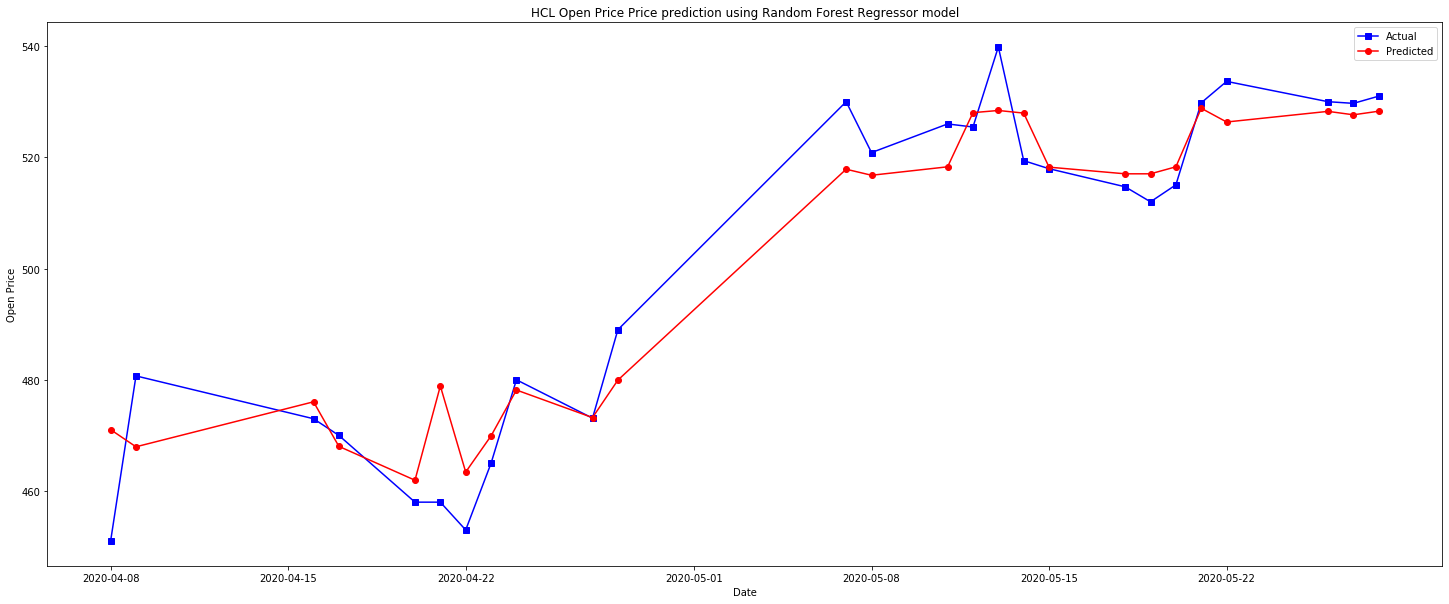

In [87]:
plt.figure(figsize = (25, 10))

plt.plot(test['Actual Open'], 'bs-', label = 'Actual')
plt.plot(test['Random Forest Predicted Open'], 'ro-', label = 'Predicted')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Open Price")

plt.title('HCL Open Price Price prediction using Random Forest Regressor model')
plt.show()

In [164]:
from joblib import dump, load
dump(model_rf, 'hcl_rf.joblib')

['hcl_rf.joblib']